In [4]:
import ast
import pandas as pd
import seaborn as sns 
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading the Dataset 
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Initial Clean-up
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [5]:
countries = ['United Kingdom', 'France', 'Netherlands', 'Germany', 'Belgium']

# Countries of interest

df_eu = df[(df['job_country'].isin(countries))]

In [6]:
df_eu_skill = df_eu.explode('job_skills')

df_eu_skill[['job_title_short', 'job_skills']]

,job_title_short,job_skills
2,Data Engineer,python
2,Data Engineer,sql
2,Data Engineer,c#
2,Data Engineer,azure
2,Data Engineer,airflow
...,...,...
785735,Senior Data Engineer,docker
785737,Data Analyst,sas
785737,Data Analyst,sas
785737,Data Analyst,sql


In [7]:
df_eu_group = df_eu_skill.groupby(['job_skills','job_title_short']).size()

df_eu_group = df_eu_group.reset_index(name='skill_count')
df_eu_group

,job_skills,job_title_short,skill_count
0,airflow,Business Analyst,40
1,airflow,Cloud Engineer,37
2,airflow,Data Analyst,546
3,airflow,Data Engineer,4347
4,airflow,Data Scientist,682
...,...,...,...
1829,zoom,Machine Learning Engineer,10
1830,zoom,Senior Data Analyst,22
1831,zoom,Senior Data Engineer,11
1832,zoom,Senior Data Scientist,8


In [8]:
df_eu_sc = df_eu_group.sort_values('skill_count', ascending=False)
df_eu_sc

,job_skills,job_title_short,skill_count
1186,python,Data Engineer,21549
1482,sql,Data Engineer,20916
1187,python,Data Scientist,20573
1481,sql,Data Analyst,17221
119,azure,Data Engineer,14239
...,...,...,...
615,heroku,Senior Data Engineer,1
627,hugging face,Business Analyst,1
1727,visual basic,Cloud Engineer,1
69,asp.net core,Business Analyst,1


In [9]:
job_titles = df_eu_sc['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3], reverse=True)
job_titles

['Data Scientist', 'Data Engineer', 'Data Analyst']

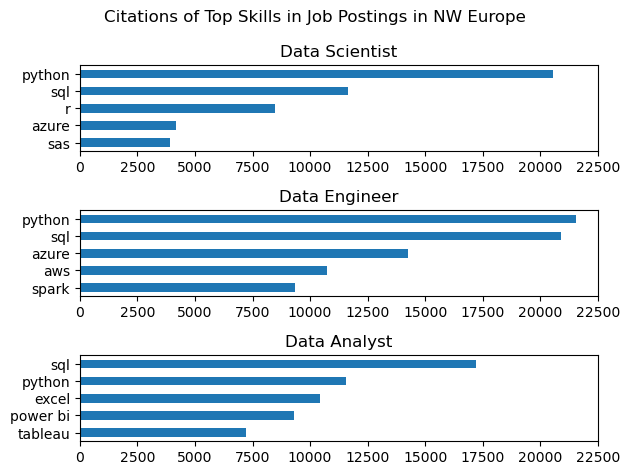

In [10]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, title in enumerate(job_titles):
    df_plot = df_eu_sc[df_eu_sc['job_title_short'] == title].head()
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 22500)

fig.suptitle('Citations of Top Skills in Job Postings in NW Europe')
plt.tight_layout()
plt.show()

In [11]:
df_title_count = df_eu['job_title_short'].value_counts().reset_index(name="jobs_total")
df_title_count

,job_title_short,jobs_total
0,Data Analyst,39346
1,Data Engineer,39282
2,Data Scientist,31553
3,Senior Data Engineer,8137
4,Senior Data Scientist,6205
5,Business Analyst,4709
6,Software Engineer,4165
7,Senior Data Analyst,4091
8,Machine Learning Engineer,1813
9,Cloud Engineer,1399


In [12]:
df_skills_perc = pd.merge(df_eu_sc, df_title_count, on='job_title_short', how='left')
df_skills_perc['skill_percent'] = 100 * (df_skills_perc['skill_count'] / df_skills_perc['jobs_total'])
#df_skills_perc['skill_percent'] = df_skills_perc['skill_percent'].apply(lambda x: f'{x:2.2f}%')
df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Engineer,21549,39282,54.857186
1,sql,Data Engineer,20916,39282,53.245761
2,python,Data Scientist,20573,31553,65.201407
3,sql,Data Analyst,17221,39346,43.768109
4,azure,Data Engineer,14239,39282,36.248154
...,...,...,...,...,...
1829,heroku,Senior Data Engineer,1,8137,0.012290
1830,hugging face,Business Analyst,1,4709,0.021236
1831,visual basic,Cloud Engineer,1,1399,0.071480
1832,asp.net core,Business Analyst,1,4709,0.021236


In [32]:
unique_skills = ['python', 'sql', 'r', 'azure', 'aws', 'sas', 'spark', 'excel', 'power bi', 'tableau']

palette_colours = sns.color_palette('tab10', n_colors=len(unique_skills))

skill_colour_dict = dict(zip(unique_skills, palette_colours))

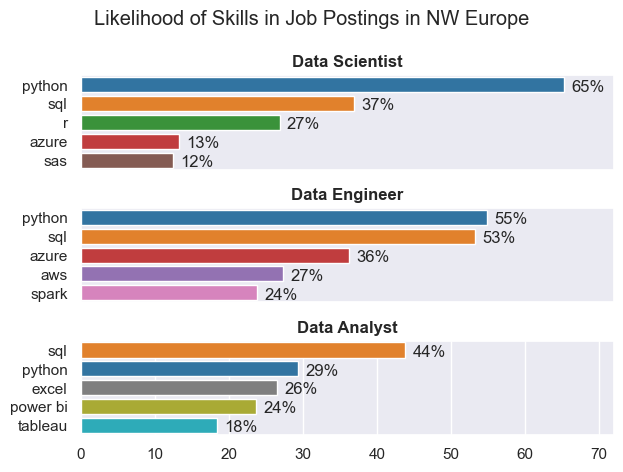

In [36]:
fig, ax = plt.subplots(len(job_titles), 1)


for i, title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == title].head()
    sns.barplot(data=df_plot,
                x = 'skill_percent',
                y = 'job_skills',
                hue='job_skills',
                palette=skill_colour_dict,
                ax=ax[i],
                )
    ax[i].set_title(title, weight='bold')
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].invert_yaxis()
    ax[i].set_xlim(0, 72)
    ax[i].legend=False

    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n+0.1, f'{v:.0f}%', va='center')

    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

sns.set_theme(style='darkgrid')

fig.suptitle('Likelihood of Skills in Job Postings in NW Europe')
plt.tight_layout()
plt.show()